# Heart Disease Proposal

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Background**

- Heart disease is a variety of conditions that effect the heart. Heart disease can go unnoticed until a person experiences a heart attack, heart failure, or an arrhythmia. We would like to explore the following patient dataset to see if there are any variables that can help us predict a diagnosis of heart disease, so the public can put preventative measures in place to lower their risk of heart disease.

**Question**

- Is there a certain target audience at risk for heart disease? 

**Dataset**

- The dataset contains patient data provided by physicians from cardiovascular clinics around the world. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. Our project will focus on the data from Cleveland, USA and we will use the following predictor variables:
 
    
    - `age`
    - `sex`
    - `trestbps` Resting Blood Pressure (mm Hg)
    - `chol` Serum Cholestrol (mg/dL)
    - `fbs` Fasting Blood Sugar > 120 mg/dL (1 = true; 0 = false)
    - `restecg` Resting Electrocardiographic Results (0 = normal, 1 = ST-T wave abnormality, 3 = probable/definite left ventricular hypertrophy)  
    - `thalach` Maximum Heart Rate Achieved   
    - `exang` Exercise Induced Angina (1 = yes; 0 = no)
    - `oldpeak` ST depression Induced by Exercise Relative to Rest  
    - `ca` Number of Major Vessels (0-3)
    - `cp` Chest Pain Type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
    - `slope` Slope of the Peak Exercise ST Segment (1 = upsloping, 2 = flat, 3 = downsloping)  
    - `thal` (3 = normal, 6 = fixed defect, 7 = reversible defect) 



- Target variable:
    - `num` Heart Disease Diagnosis (present = 1, 2, 3, 4 ; absent =  0)

Original Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Preliminary Exploratory Data Analysis

**Loading R libraries**

In [1]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading Data**

In [2]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "heart_disease")

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering Missing Values** 

In [3]:
filtered_data <- cleveland_data |>
    filter(ca != "?", thal != "?")|>
    drop_na()

filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Mutating Data**

For our target variable (column `heart_disease`), the numerical value 1, 2, 3 and 4 all indicate the presence of heart disease in a patient, so we first combined them into a single variable, then mutated the type from numerical to factor.

In [4]:
mutate_data <- filtered_data |>
    mutate(heart_disease = ifelse(heart_disease == 0, 0, 1)) |>
    mutate(heart_disease = as_factor(heart_disease))

mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Changing the column data type**

After clearing missing values, we mutate the `ca` and `thal` columns from character to numeric.

In [5]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


**Splitting the data into training and testing data**

In [6]:
set.seed(978)
heart_split <- initial_split(final_data, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

**Summarizing the training data**

Distribution of each categorical predictor variables. **See the intro for information about the numerical value.**

In [7]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(sex_count = n())

count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(fbs_count = n())

count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(restecg_count = n())

count_exang <- heart_train|>
    group_by(exang)|>
    summarize(exang_count = n())

count_slope <- heart_train|>
    group_by(slope)|>
    summarize(slope_count = n())

count_ca <- heart_train|>
    group_by(ca)|>
    summarize(ca_count = n())

count_thal <- heart_train|>
    group_by(thal)|>
    summarize(thal_count = n())

count_cp <- heart_train|>
    group_by(cp)|>
    summarize(cp_count = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_cp

sex,sex_count
<dbl>,<int>
0,68
1,154


fbs,fbs_count
<dbl>,<int>
0,188
1,34


restecg,restecg_count
<dbl>,<int>
0,104
1,1
2,117


exang,exang_count
<dbl>,<int>
0,154
1,68


slope,slope_count
<dbl>,<int>
1,99
2,109
3,14


ca,ca_count
<dbl>,<int>
0,135
1,46
2,29
3,12


thal,thal_count
<dbl>,<int>
3,120
6,15
7,87


cp,cp_count
<dbl>,<int>
1,22
2,39
3,56
4,105


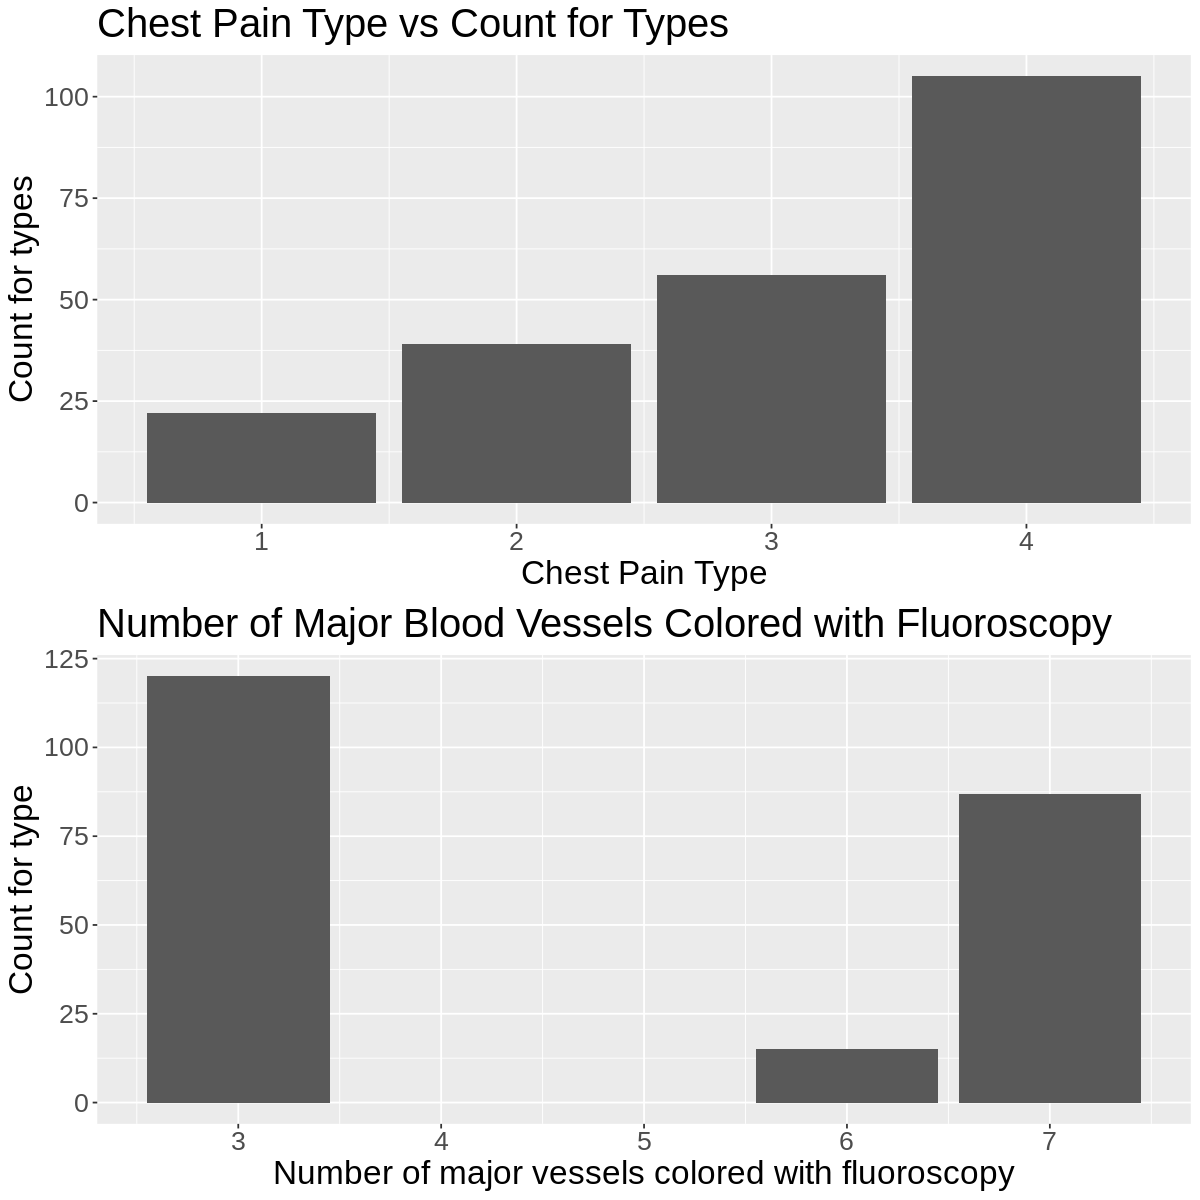

In [8]:
type_vs_cp <- count_cp |>
    ggplot(aes(x = cp, y = cp_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Chest Pain Type",y = "Count for types", fill = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Chest Pain Type vs Count for Types")

type_vs_thal <- count_thal |>
    ggplot(aes(x = thal, y = thal_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of major vessels colored with fluoroscopy",y = "Count for type", fill = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of Major Blood Vessels Colored with Fluoroscopy")

plot_grid(type_vs_cp, type_vs_thal, ncol = 1)


We can see from the data and two example visualization above that most of the categorical predictor variables are not evenly distributed in the data set. So that we should cut off those variables that are very undistributed but we can still see if there are relationship between the variables and heart disease.

**Mean of the numerical predictor values**

In [9]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.43694,131.7387,247.5811,149.7613,1.018468


*Overlaying distribution of the numerical predictor variables*

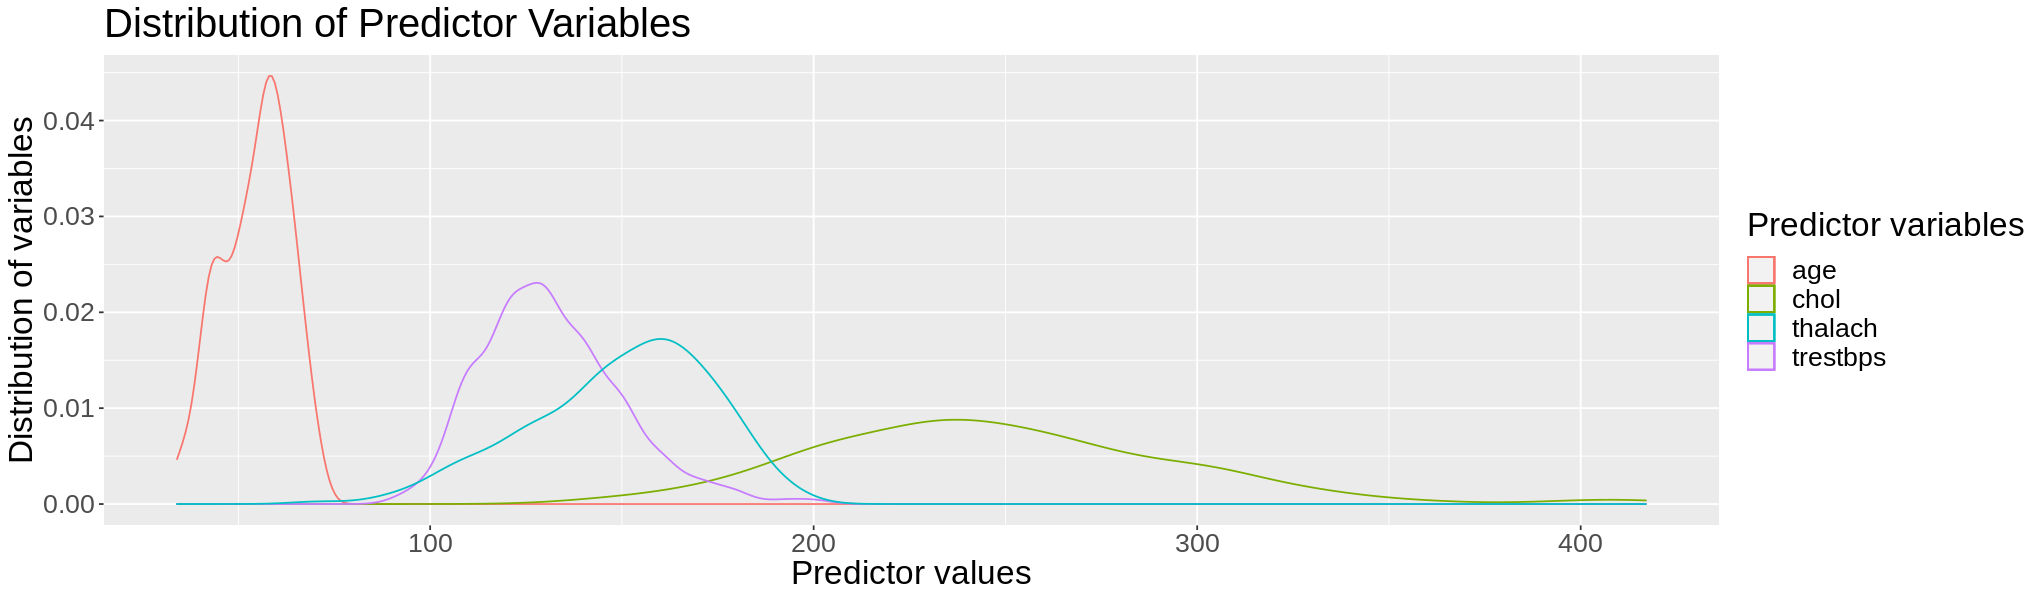

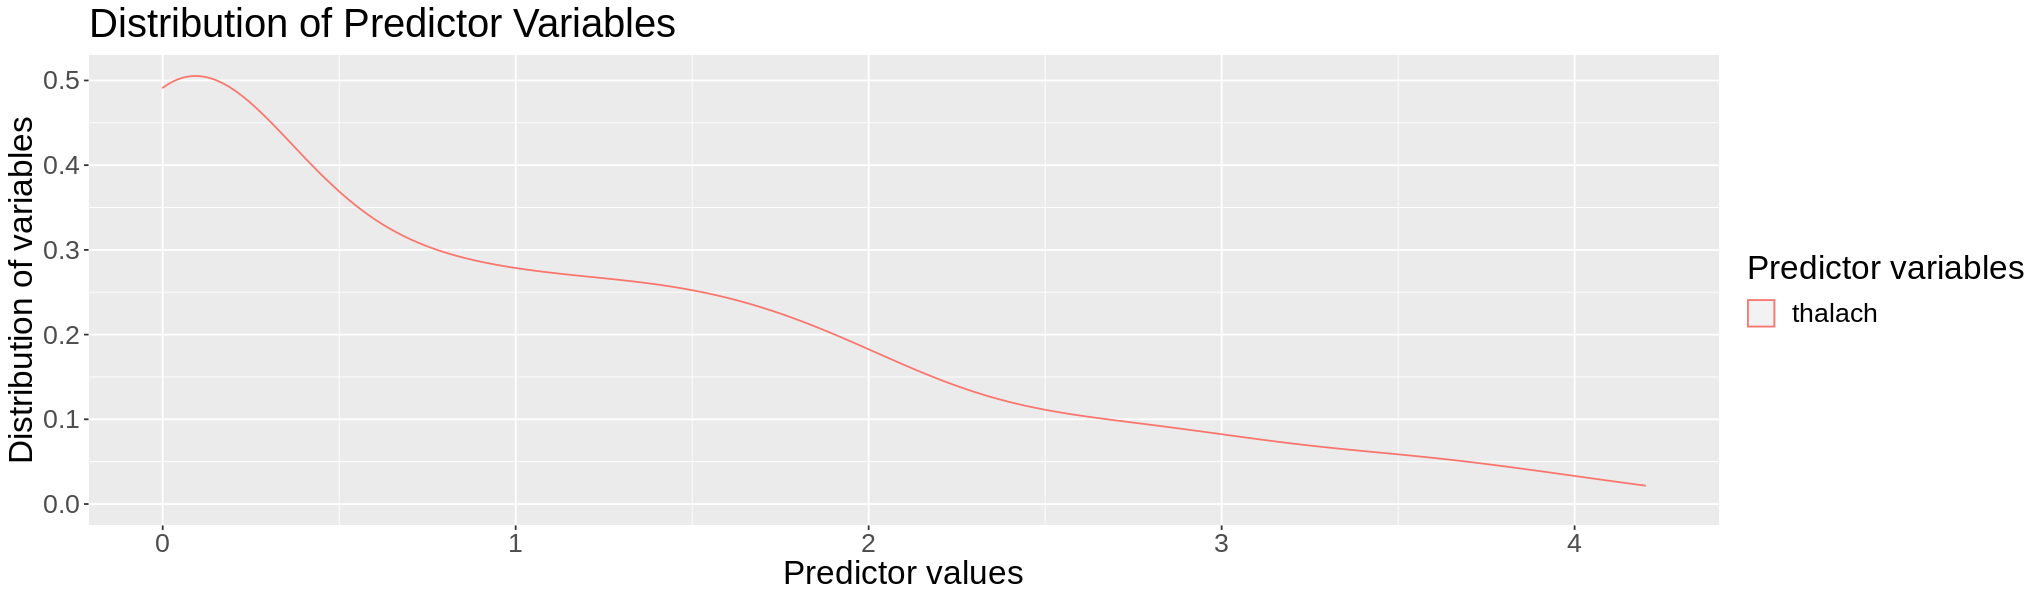

In [10]:
options(repr.plot.width=17, repr.plot.height=5)
dis_plot <- heart_train|>
    ggplot() + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Predictor Variables")
dis_plot


dis_plot_2 <- heart_train|>
    ggplot() + 
    geom_density(aes(x=oldpeak, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Predictor Variables")
dis_plot_2




*Did in two graph since scaling issue.* 

**Discover the distribution of heart disease**

In [11]:
counting_types <- heart_train |>
    group_by(heart_disease)|>
    summarize(types_count = n()) 
counting_types

heart_disease,types_count
<fct>,<int>
0,120
1,102


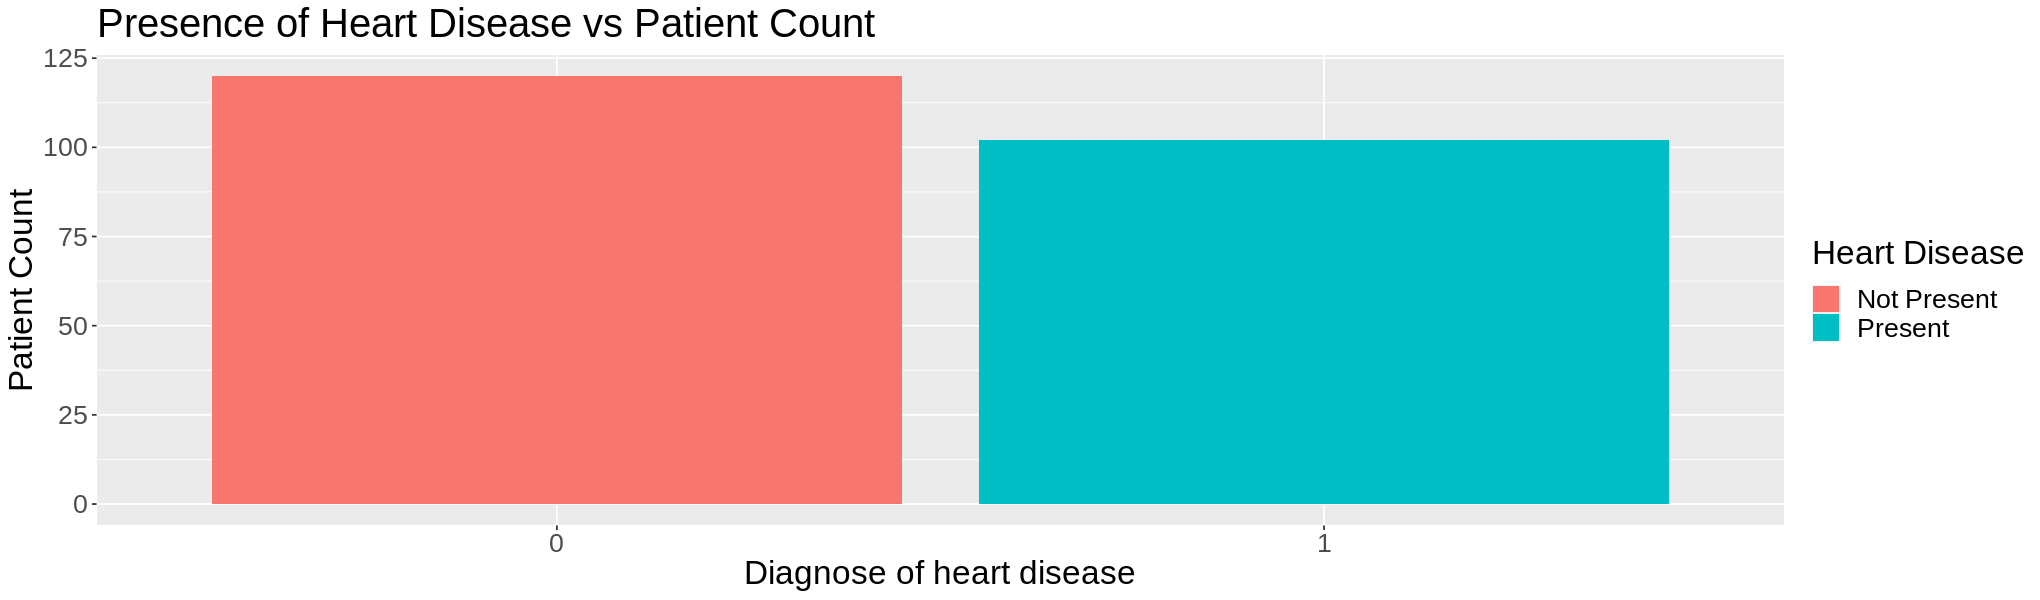

In [12]:
type_vs_heart_disease <- counting_types |>
    ggplot(aes(x = heart_disease, y = types_count, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", color = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
type_vs_heart_disease

We can see from the graph that the distribution of heart disease is even which is really good! 

**Exploring the relationship between predictor variables***

We used the ggpairs() function from the GGally package to build a scatterplot matrix. This helps us visualize the relationships between different predictor variables and our target variable (heart disease). With this we are able to effeciently visualize a large quantity of data, and only choose relevant relationships to explore further.

Continous Predictor Variables vs Categorical Target Variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



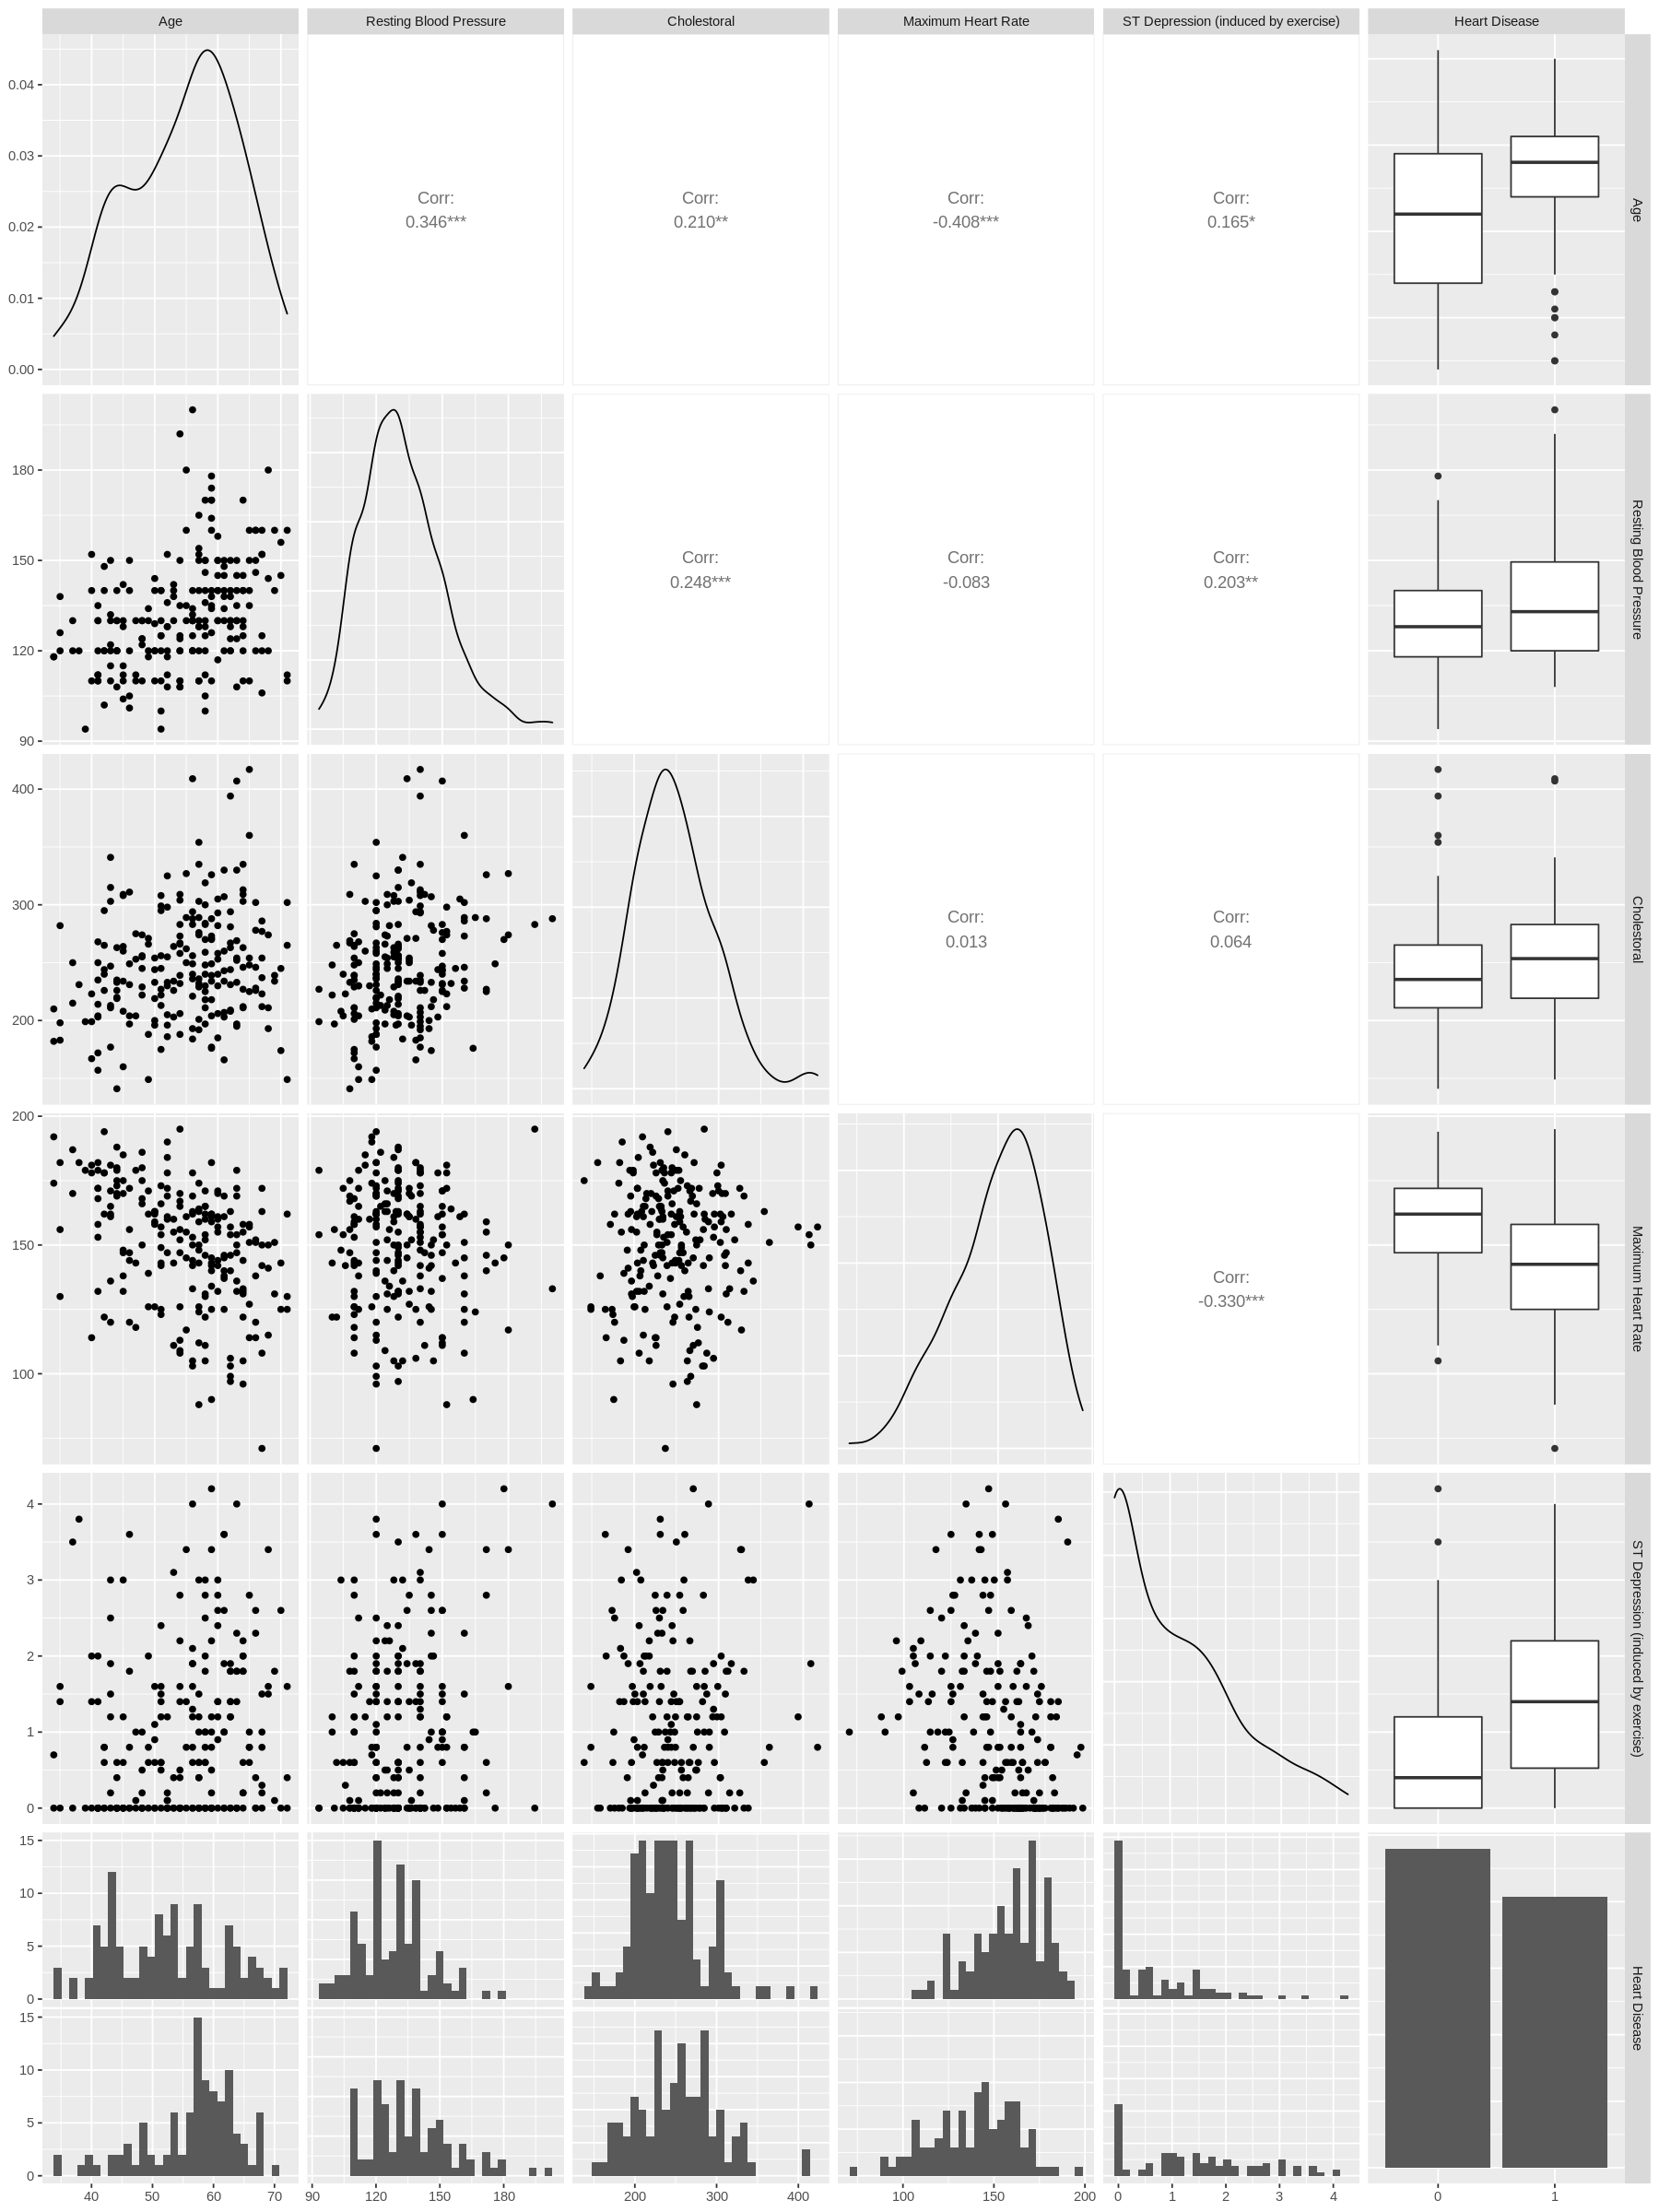

In [18]:
options(repr.plot.width = 15, repr.plot.height = 20) 
heart_ggpair <- heart_train |>
    ggpairs(columns = c("age", "trestbps", "chol", "thalach", "oldpeak", "heart_disease"), columnLabels = c("Age", "Resting Blood Pressure", "Cholestoral", "Maximum Heart Rate", "ST Depression (induced by exercise)", "Heart Disease"))

heart_ggpair

#todo: jade - solve binwidth warning

In [ ]:
Categorical Predictor Variables vs Categorical Target Variable

In [ ]:
#todo

In [14]:
#options(repr.plot.width = 15, repr.plot.height = 8) 
#
#trestbps_vs_chol <- heart_train |>
#    ggplot(aes(x = chol , y = trestbps, color = heart_disease))+
#    geom_point()+
#    labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Heart Disease", labels = c("Not Present", "Present")) +
#    ggtitle("Cholestorol vs Resting Blood Pressure")+
#    theme(text = element_text(size = 20))
#trestbps_vs_chol

#Note: *Arguably weak positive relationship*

In [15]:
#oldpeak_vs_age <- heart_train |>
#    ggplot(aes(x = age , y = oldpeak, color = heart_disease)) +
#    geom_point() +
#    labs(x = "Age", y = "ST depression Induced", color = "Heart Disease") +
#    scale_color_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
#    ggtitle("Age vs ST depression Induced") +
#    theme(text = element_text(size = 20))
#oldpeak_vs_age

#Note: *No relationship*

In [16]:
#age_vs_thalach <- heart_train |>
#    ggplot(aes(x = age , y = thalach, color = heart_disease)) +
#    geom_point()+
#    labs(x = "Age", y = "Maximum Heart Rate Achieved (bps)", color = "Heart Disease") +
#    scale_color_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
#    ggtitle("Age vs Maximum Heart Rate Achieved") +
#    theme(text = element_text(size = 20))
#age_vs_thalach

#Note: *Arguably weak negative relationship*

Here, we visualize the distribution of chest pain types of males vs females.

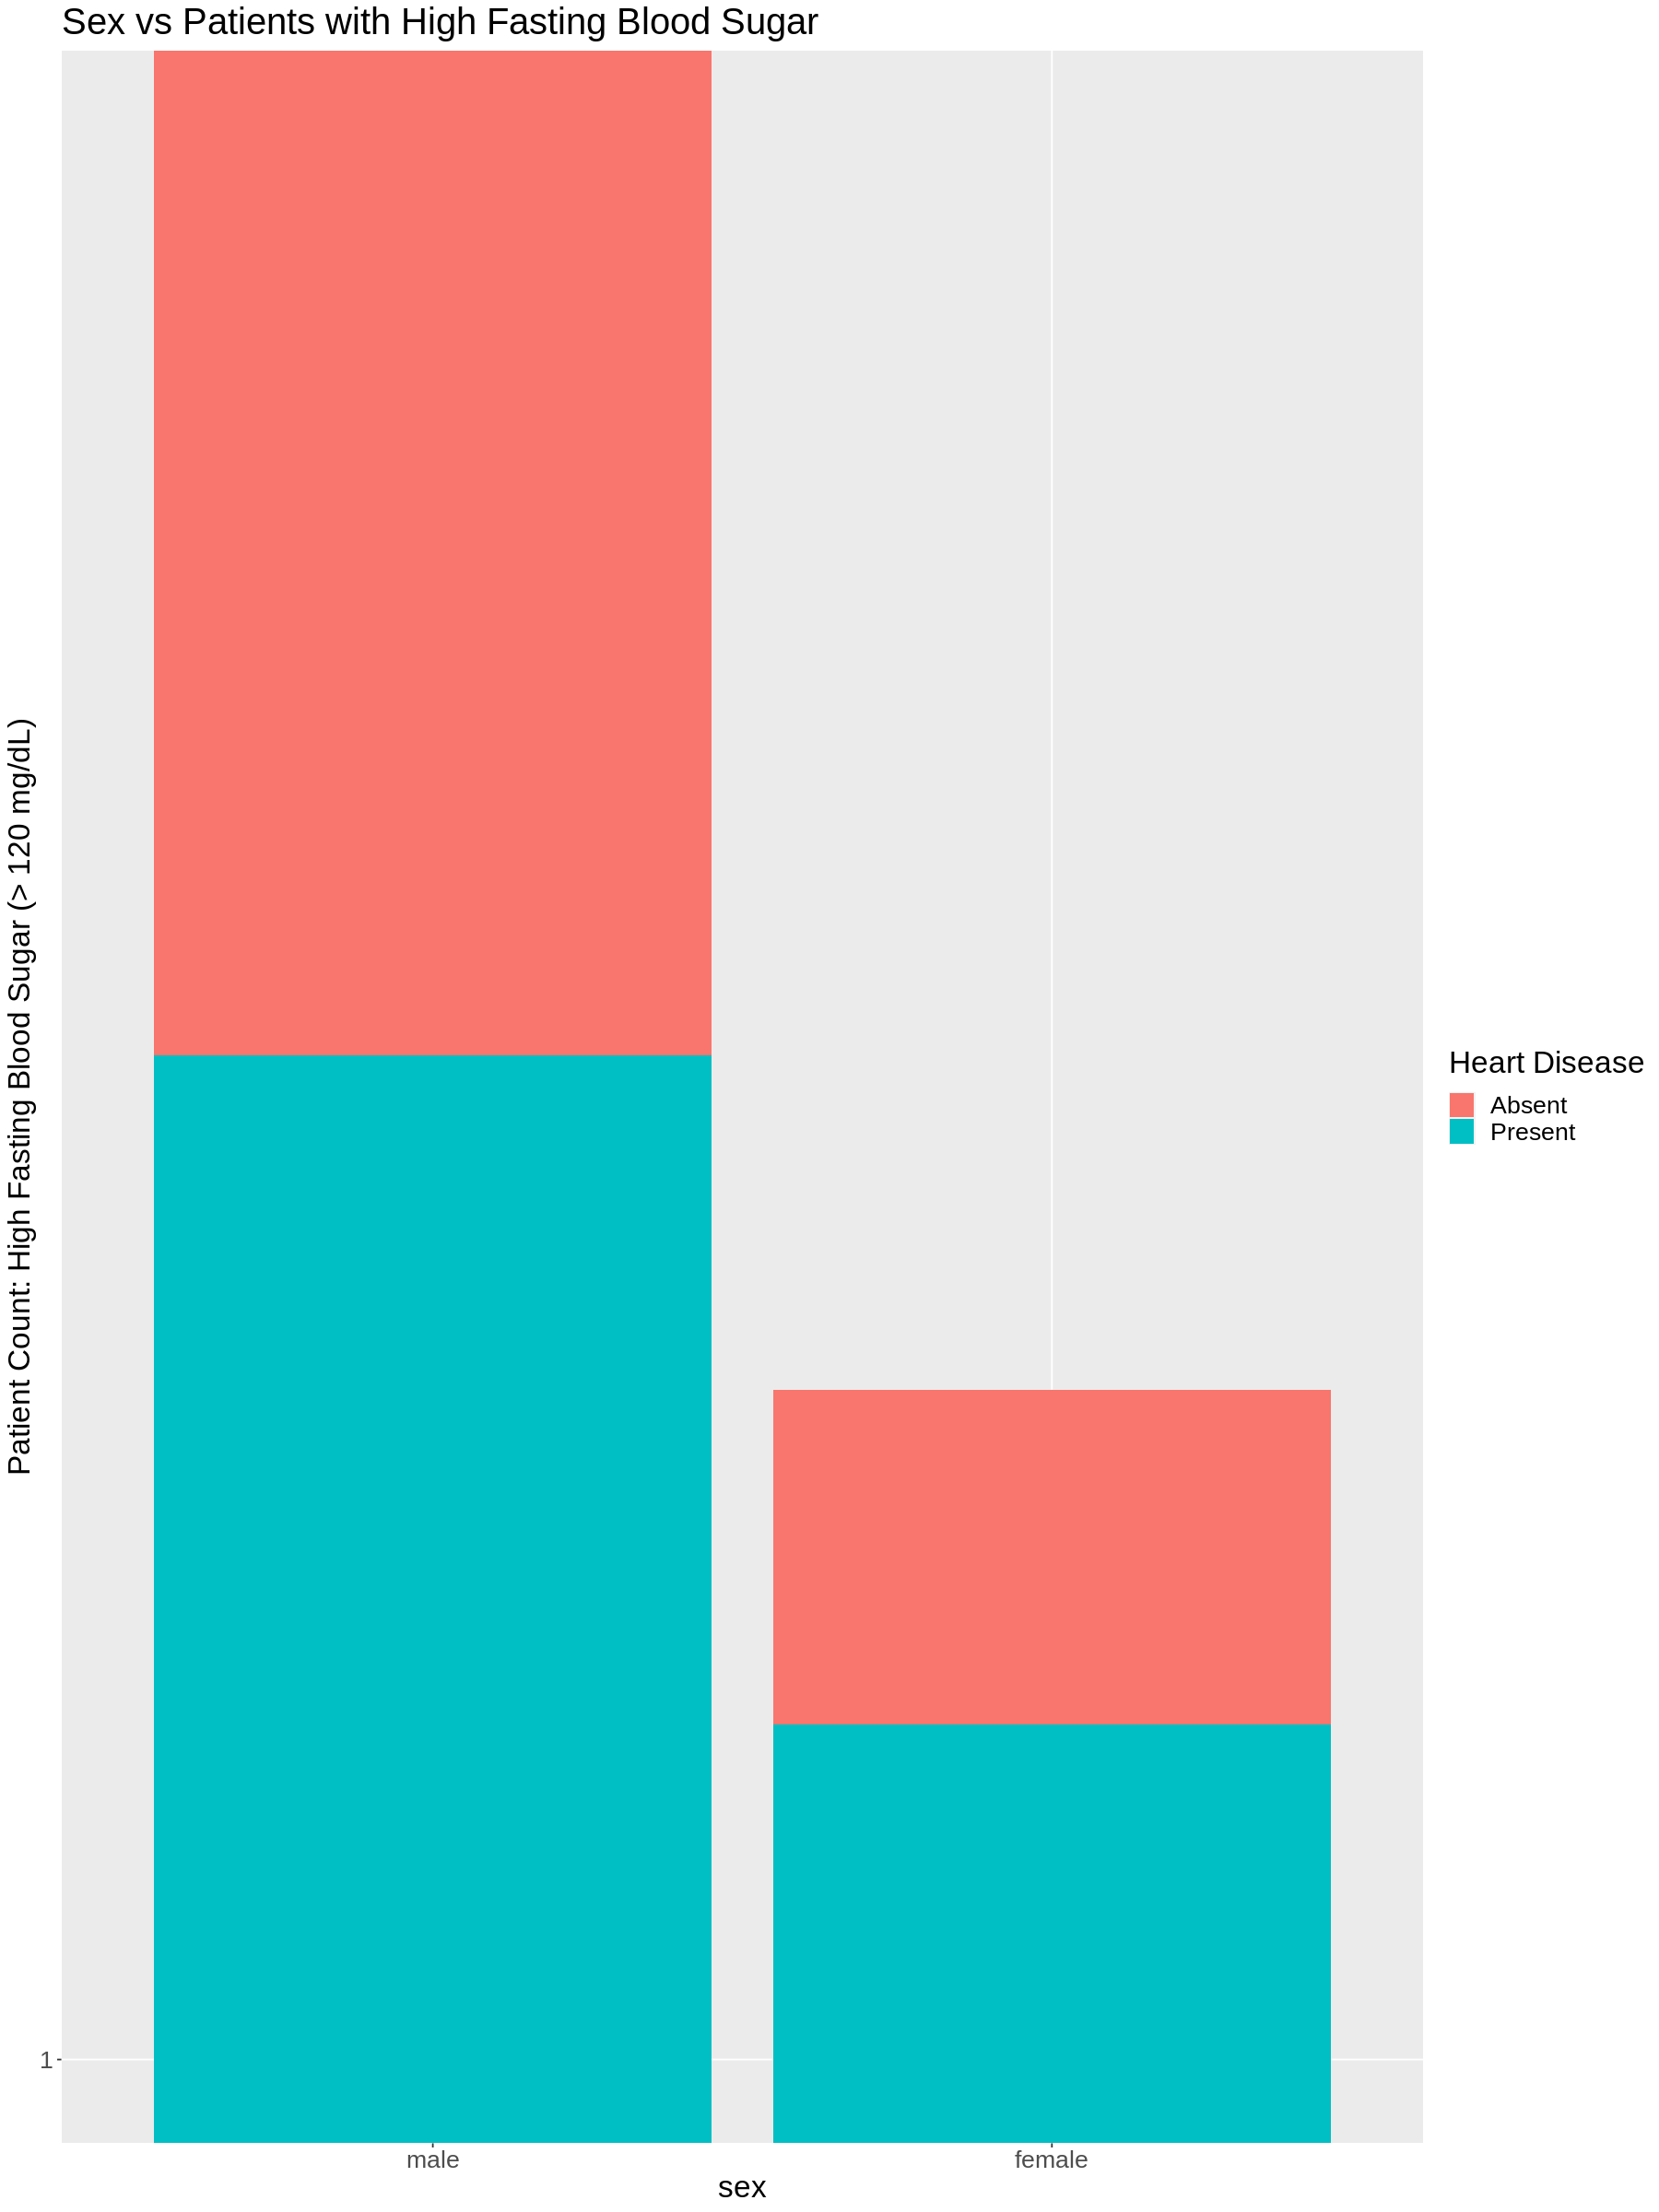

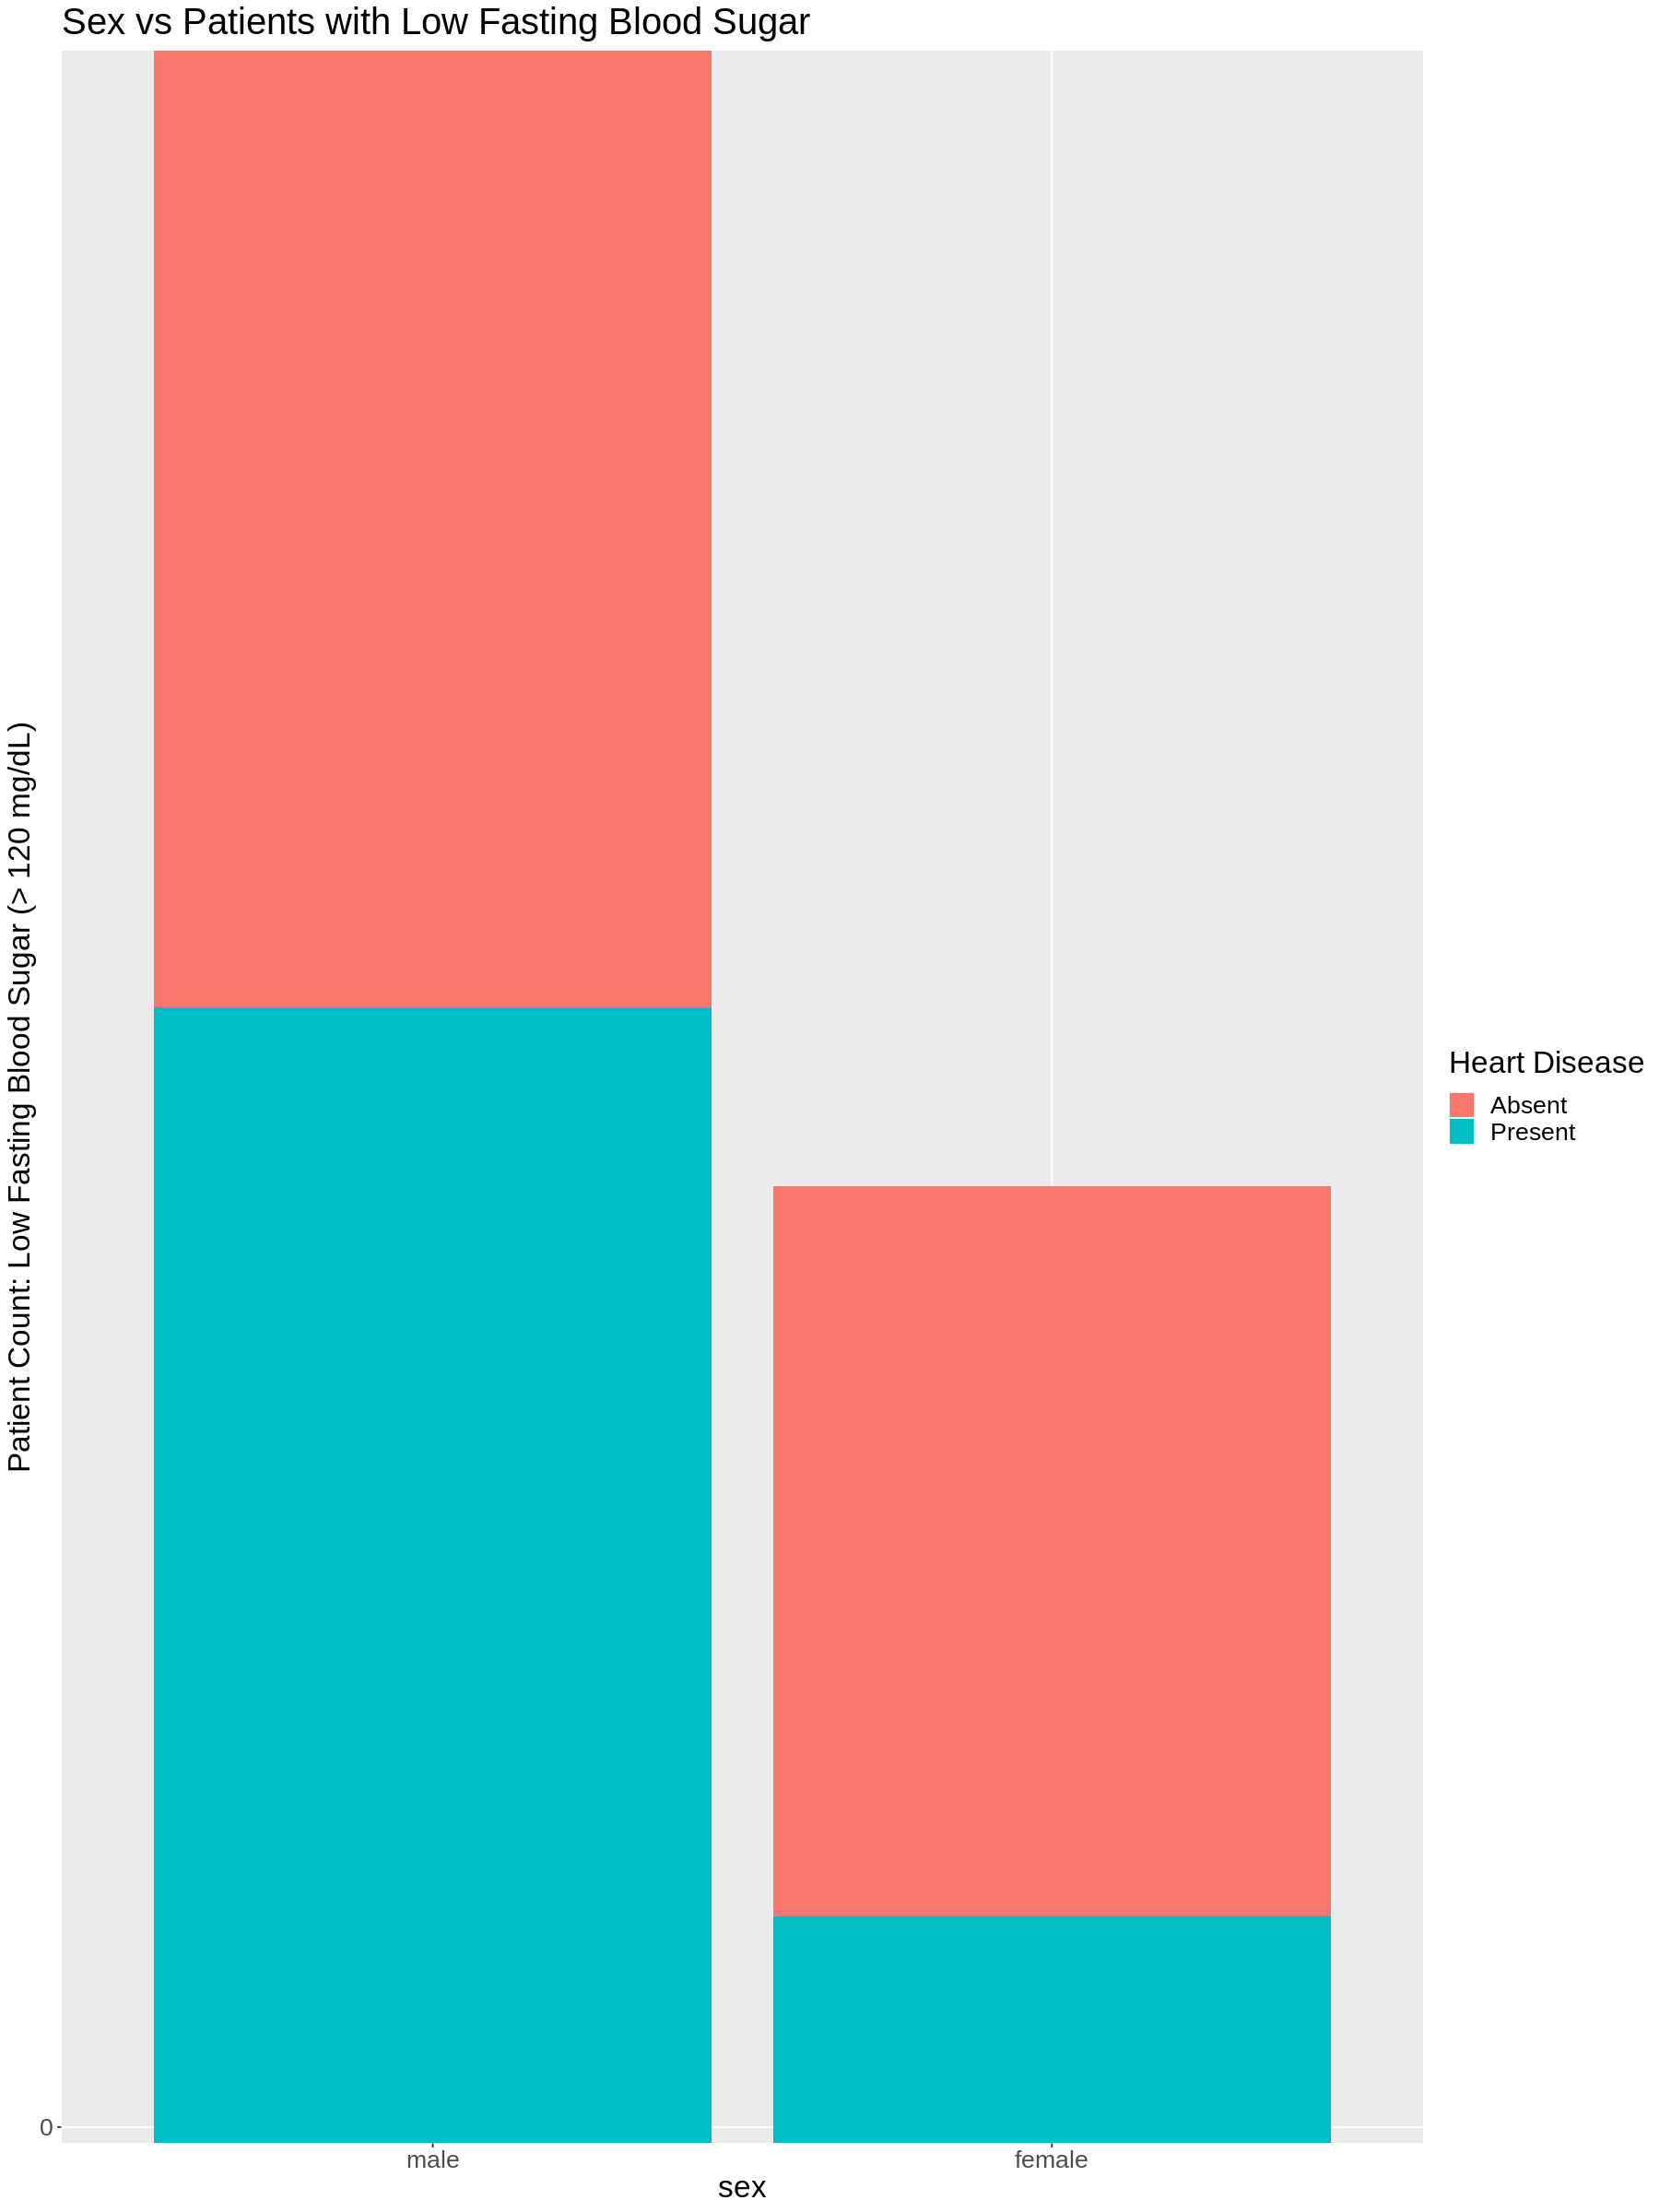

In [17]:
sex_vs_fbs_true  <- heart_train |>
    filter(fbs == 1) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count: High Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs Patients with High Fasting Blood Sugar") +
    theme(text = element_text(size = 20))
sex_vs_fbs_true
sex_vs_fbs_false  <- heart_train |>
    filter(fbs == 0) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count: Low Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs Patients with Low Fasting Blood Sugar") +
    theme(text = element_text(size = 20))
sex_vs_fbs_false

*Blood sugar is indeed affecting heart disease*

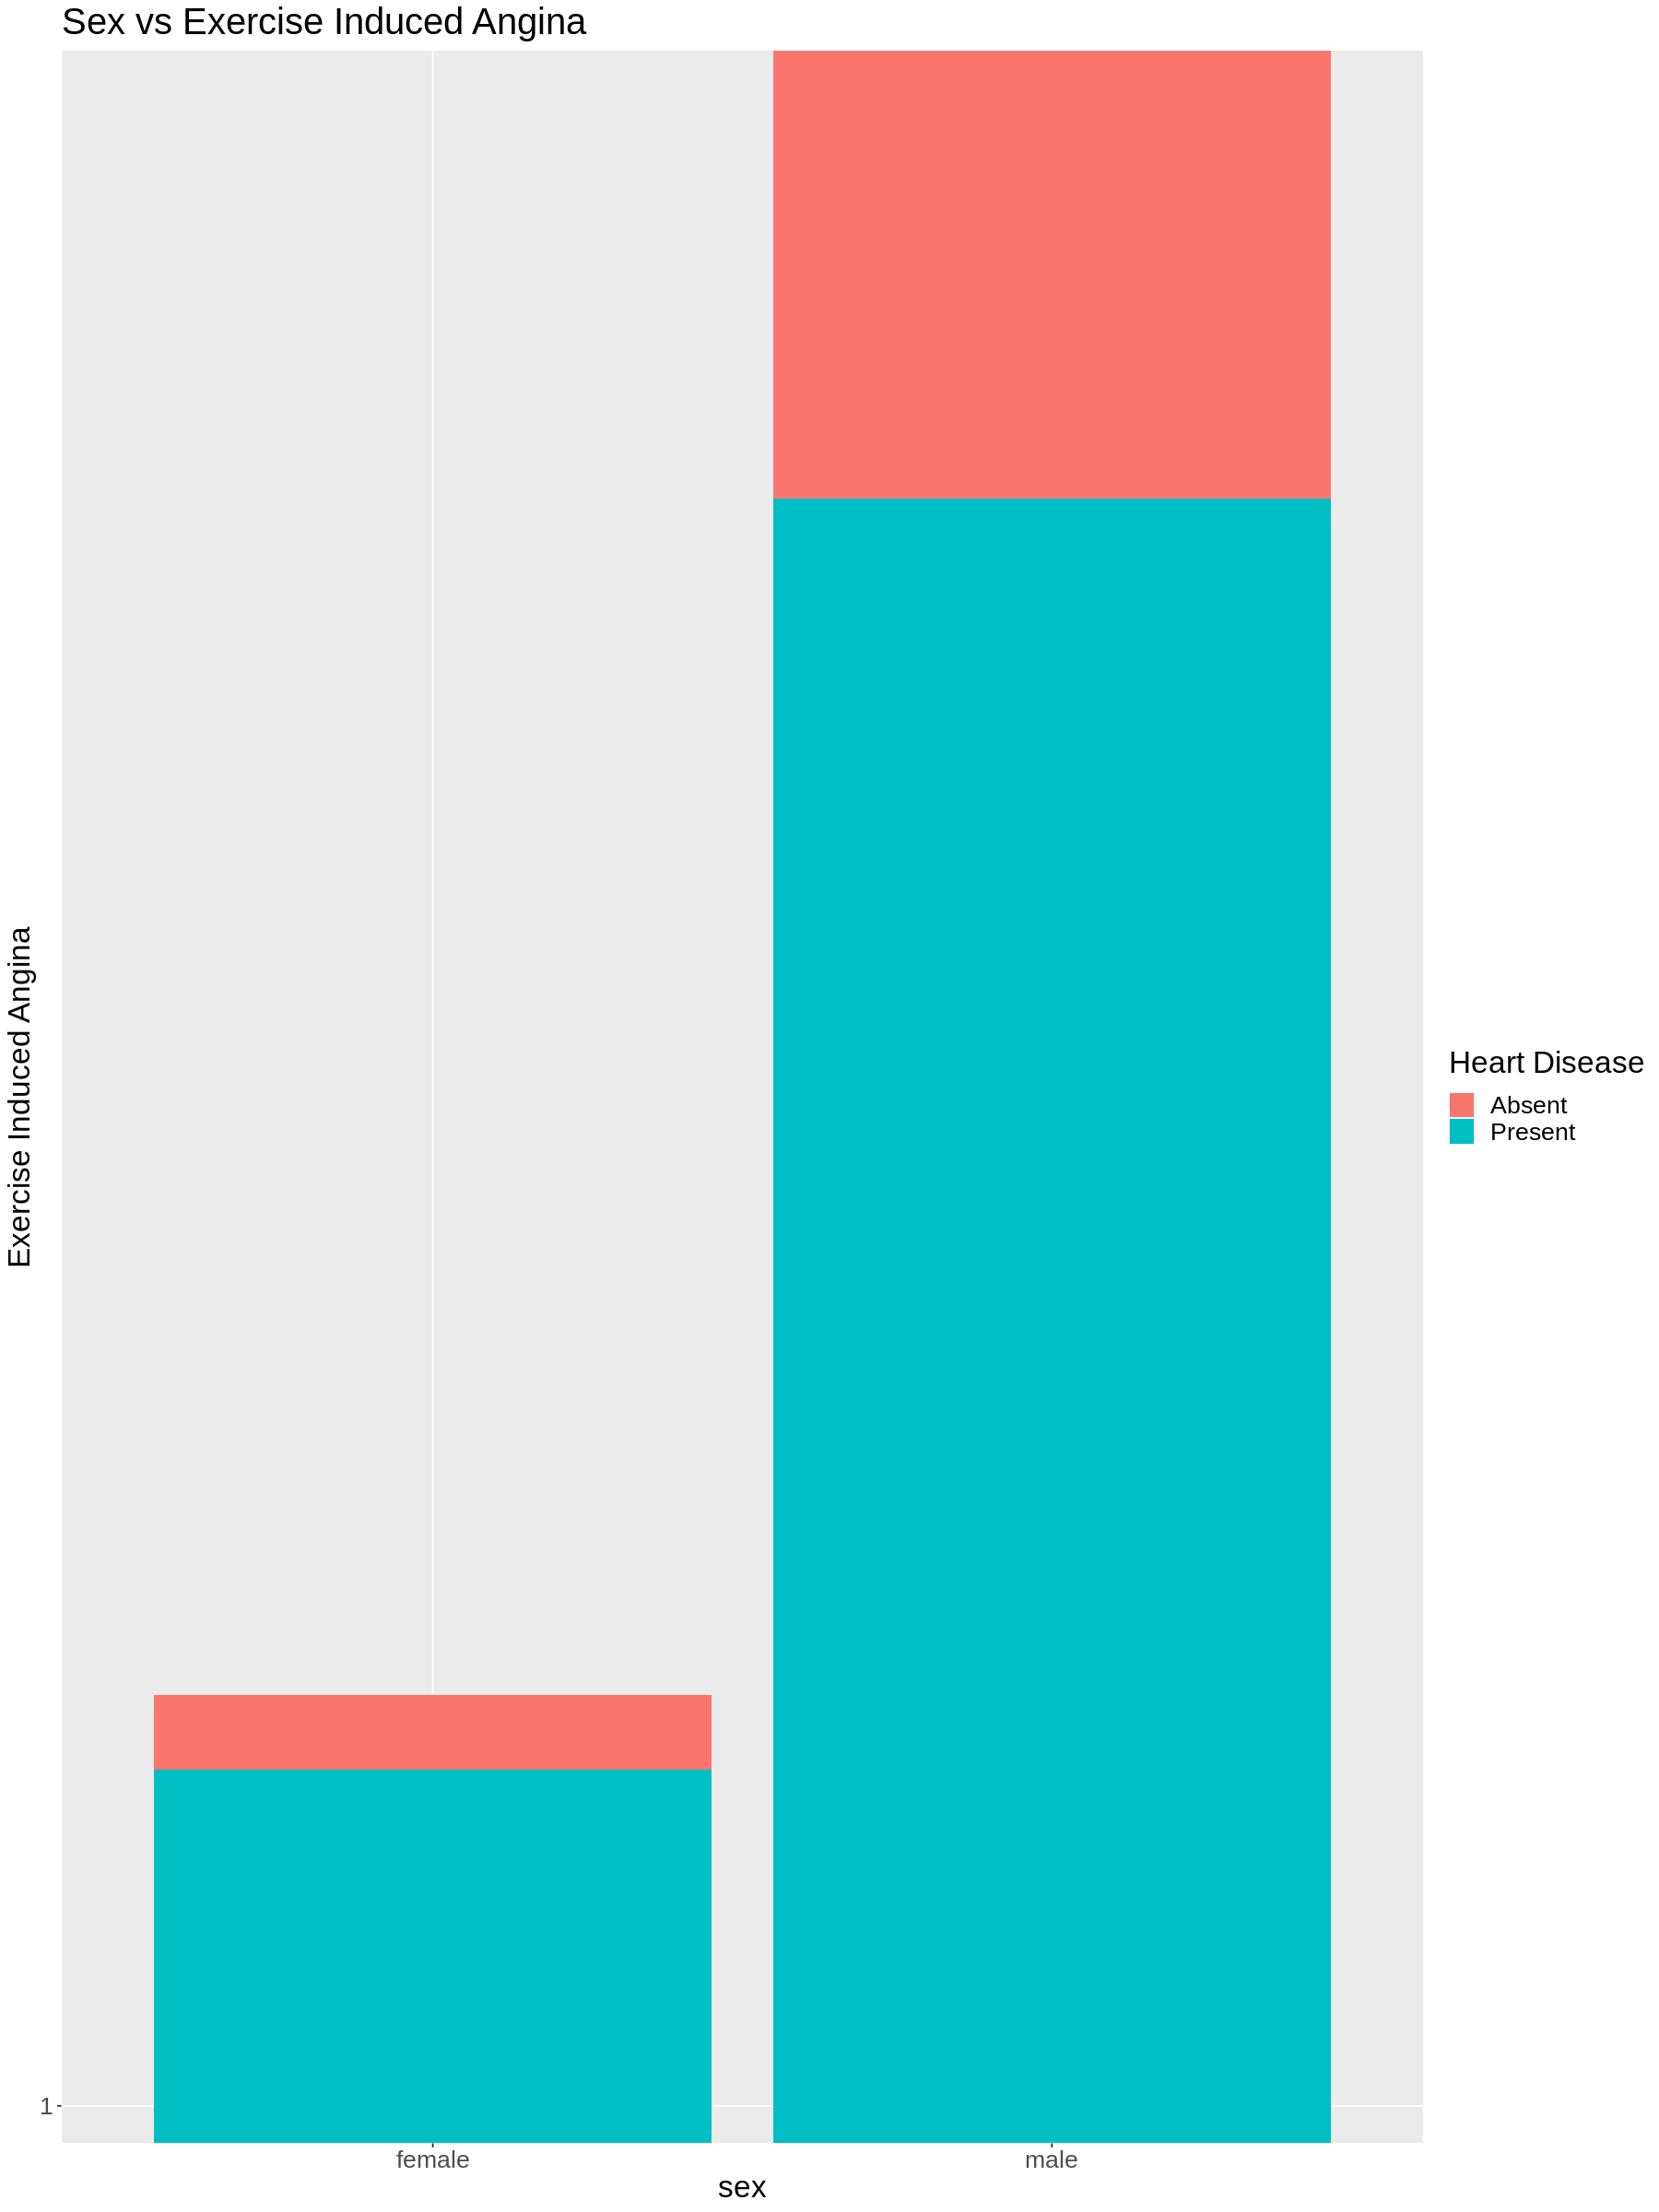

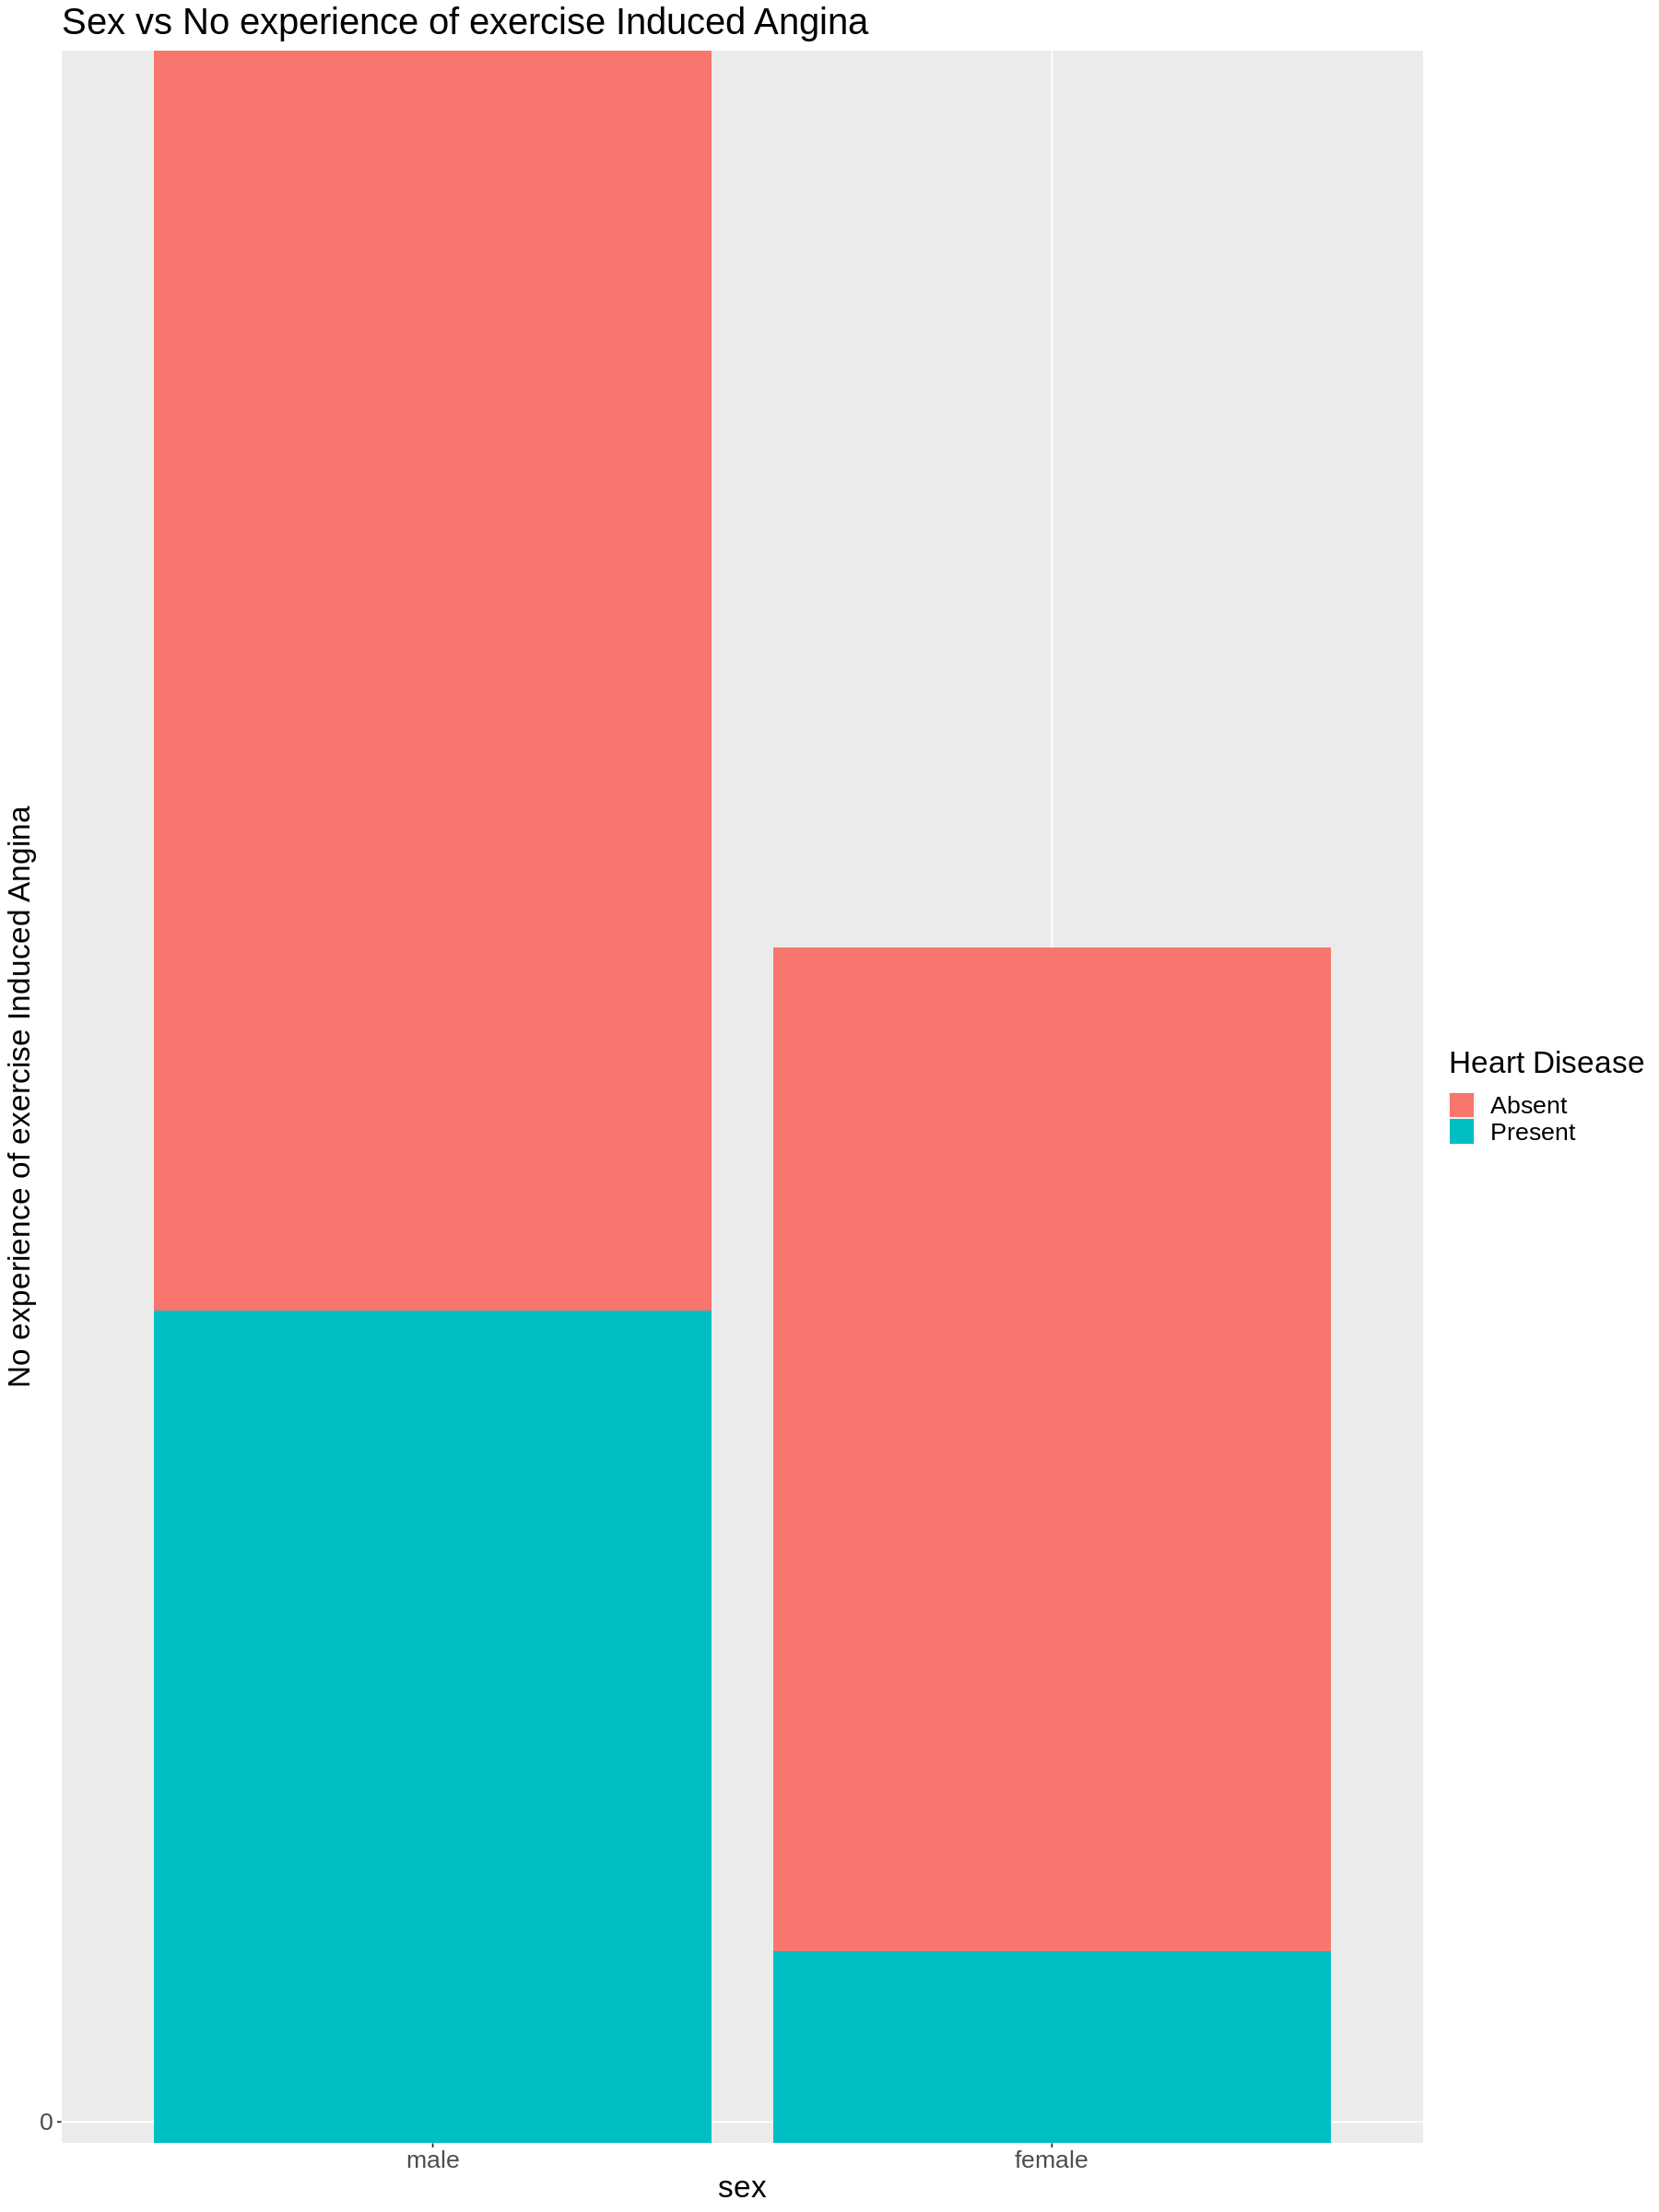

In [18]:
sex_vs_exang_true  <- heart_train |>
    filter(exang == 1) |>
    mutate(exang = as.factor(exang)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = exang, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Exercise Induced Angina", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs Exercise Induced Angina") +
    theme(text = element_text(size = 20))
sex_vs_exang_true
sex_vs_exang_false  <- heart_train |>
    filter(exang == 0) |>
    mutate(exang = as.factor(exang)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = exang, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "No experience of exercise Induced Angina", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs No experience of exercise Induced Angina") +
    theme(text = element_text(size = 20))
sex_vs_exang_false

*Exercise Induced Angina has relationship with heart disease*

## Methods

**Explain how you will conduct either your data analysis and which variables/columns you will use -> predictors, using classification, validation in the end**
- Our project question asks us to identify whether there is a certain target audience/identity associated with the diagnosis of heart disease. To do this, we will check for the relationship between each variable and the diagnosis of heart disease as a class. We will then use the variables with a positive relationship as predictor variables and eliminate the bad variables(restecg, slope, and oldpeak) because they are undistributed or have no relation in the graphs created. Eventually, we will build an identity or predicted audience strongly associated with heart disease diagnosis. The line and bar chart graphs will allow us to visualize the distribution of the predictor value in relation to our target variable, displaying whether a significant or strong relation exists between the two variables 

## Expected outcomes and significance

**Expected Outcomes**
- Our team predicts that heart risk disease will mainly attract a male audience of older age and previous chest pain experiences due to previous literature reviews.

**Impacts**
- The reasoning behind this project is to ensure the general public is aware of certain life factors they may have that are making them more susceptible to heart disease. This could lead to folks putting in place preventive measures and taking care of themselves in specific ways to prevent disease.

**Future Implications**
- These findings could lead to follow-up questions that inquire and try to find the reasoning behind why heart disease is more susceptible to a specific identity and question what other external factors not considered in this project could influence the risk of heart disease.


## Building a Classification Model

**Creating a Recipe**

In [19]:
set.seed(978)

heart_recipe <- recipe(heart_disease ~ age + sex + cp + trestbps + chol + fbs + exang + ca + thal, 
                       data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

**Selecting Optimal k**

In [20]:
set.seed(978)

#creating an initial model
heart_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("classification")

#performing 5-fold cross validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = heart_disease)

#collecting metrics for 10 values of k
heart_metrics <- workflow() |>
                 add_recipe(heart_recipe) |>
                 add_model(heart_knn) |>
                 tune_grid(resamples = heart_vfold, grid = 10) |>
                 collect_metrics(truth = heart_disease, estimate = pred_heart_disease) |>
                 filter(.metric == "accuracy")

#selecting the k with greatest accuracy
best_k <- heart_metrics |>
          filter(mean == max(mean)) |>
          pull(neighbors)
best_k

[1] 10

**Creating and Fitting the Model**

In [31]:
set.seed(978)

#new model with optimal k
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")

#fitting the model
heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(heart_spec) |>
             fit(data = heart_train)

**Determing Prediction Accuracy using Test Set**

In [41]:
set.seed(978)

heart_predictions <- predict(heart_fit, heart_test) |>
                     bind_cols(heart_test) |>
                     metrics(truth = heart_disease, estimate = .pred_class) |>
                     filter(.metric == "accuracy") |>
                     pull(.estimate)
heart_predictions

[1] 0.8266667